In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [4]:
# Build the Sequential feedforward neural network model
model = Sequential ([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10),
    Softmax()
])



In [5]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [30]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation='softmax')
])


In [31]:
# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [41]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc, mae])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [42]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [43]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [44]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [45]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [46]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images / 255.
test_images = test_images / 255.

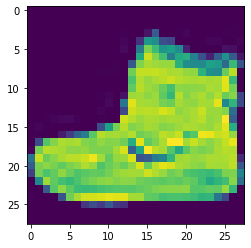

label: Ankle boot


In [51]:
# Display one of the images
i = 0
img = train_images [i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")


#### Fit the model

In [48]:
# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose = 2)


Epoch 1/8
235/235 - 13s - loss: 0.5663 - sparse_categorical_accuracy: 0.8012 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 13s - loss: 0.3745 - sparse_categorical_accuracy: 0.8682 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 13s - loss: 0.3466 - sparse_categorical_accuracy: 0.8777 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 13s - loss: 0.3267 - sparse_categorical_accuracy: 0.8843 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 13s - loss: 0.3164 - sparse_categorical_accuracy: 0.8875 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 13s - loss: 0.3080 - sparse_categorical_accuracy: 0.8895 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 13s - loss: 0.2957 - sparse_categorical_accuracy: 0.8941 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 13s - loss: 0.2919 - sparse_categorical_accuracy: 0.8961 - mean_absolute_error: 4.4200


#### Plot training history

In [52]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.566347,0.801183,4.420001
1,0.374483,0.868217,4.419999
2,0.346601,0.877667,4.420000
3,0.326729,0.884300,4.419999
4,0.316427,0.887467,4.420000


[Text(0, 0.5, 'loss'), Text(0.5, 0, 'Epochs')]

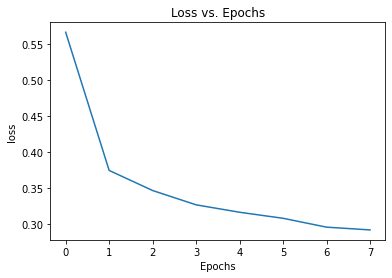

In [58]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title = "Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="loss")


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

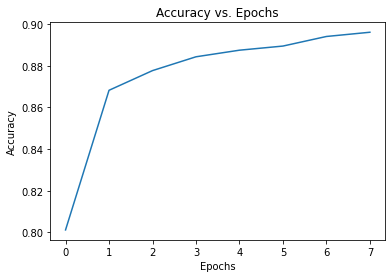

In [57]:
# Make a plot for the accuracy
accuracy_plot = df.plot(y="sparse_categorical_accuracy", 
                        title = "Accuracy vs. Epochs", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="Accuracy")


[Text(0, 0.5, 'Metrics'), Text(0.5, 0, 'Epochs')]

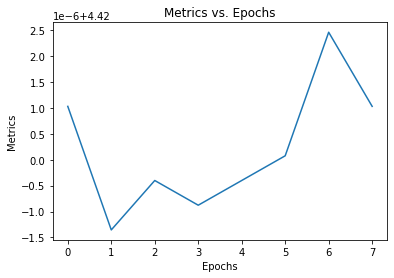

In [56]:
# Make a plot for the additional metric
metrics_plot = df.plot(y="mean_absolute_error", title = "Metrics vs. Epochs", legend=False)
metrics_plot.set(xlabel="Epochs", ylabel="Metrics")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [59]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)


313/313 - 2s - loss: 0.3221 - sparse_categorical_accuracy: 0.8878 - mean_absolute_error: 4.4200


#### Make predictions from the model

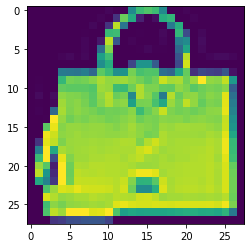

Label: Bag


In [60]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [62]:
# Get the model predictions
predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction: {labels[np.argmax(predictions)]}")


Model prediction: Bag
